![Qusetion_5](HW1_Q5.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

In [2]:
img = io.imread("C:/Users/saram/NUM.LIN.ALGEBRA/pillars_of_creation.png")  
gray_img = color.rgb2gray(img)

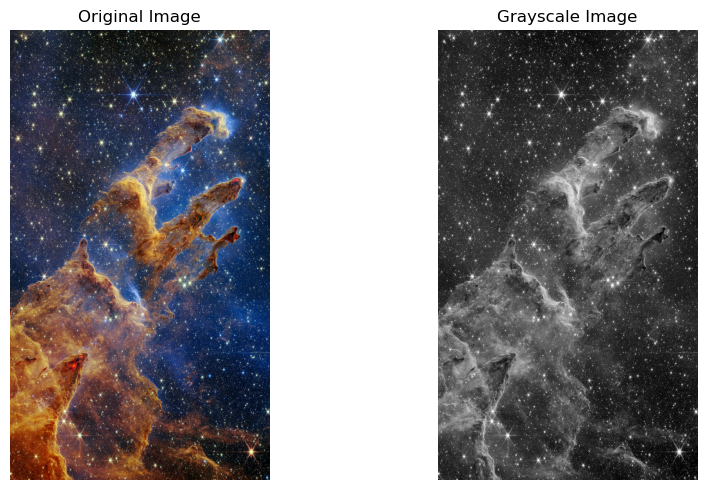

In [3]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')  

plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')  
plt.title('Grayscale Image')
plt.axis('off')  

plt.tight_layout()  
plt.show()

In [4]:
# first compute SVD from NumPy 

U, Sigma, VT = np.linalg.svd(gray_img, full_matrices=False)

In [5]:
# define a function that takes performs the approximation and takes the rank as an input also  

def SVD_rank_approx(U, Sigma, VT, k):
    U_k = U[:, :k]  #take only till the kth column from U 
    Sigma_k = np.diag(Sigma[:k]) # take only till the kth singular value
    VT_k = VT[:k, :] #take only till the kth row from VT 
    return np.dot(U_k, np.dot(Sigma_k, VT_k)) #return A=U.sigma.VT after k approx.

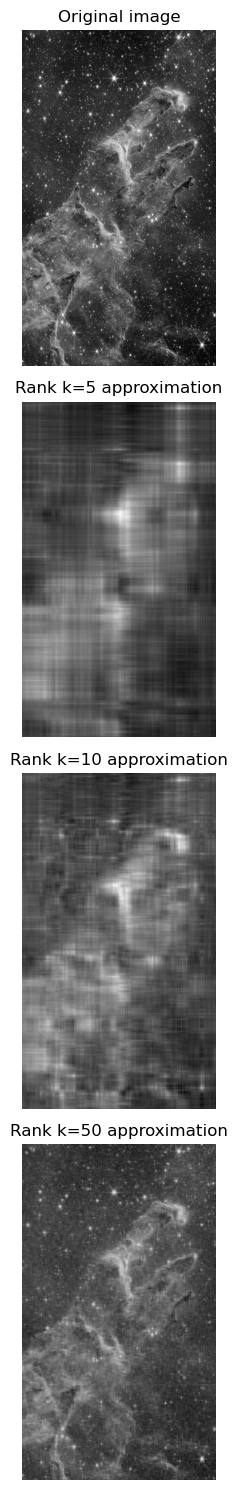

In [6]:
ranks = [5, 10, 50] # the ranks 
approxs = [SVD_rank_approx(U, Sigma, VT, k) for k in ranks] # use the function


plt.figure(figsize=(6, 15))
plt.subplot(len(ranks) + 1, 1, 1)  
plt.imshow(gray_img, cmap='gray')
plt.title('Original image')
plt.axis('off')  


for i, k in enumerate(ranks):
    plt.subplot(len(ranks) + 1, 1, i + 2)  
    plt.imshow(approxs[i], cmap='gray')
    plt.title(f'Rank k={k} approximation')
    plt.axis('off')  

plt.tight_layout()  
plt.show()

In [7]:
# plt.figure(figsize=(10, 10))
# plt.subplot(2, 2, 1)
# plt.imshow(gray_img, cmap='gray')
# plt.title('Original Image')
# plt.axis('off')

# for i, k in enumerate(ranks):
#     plt.subplot(2, 2, i+2)
#     plt.imshow(approxs[i], cmap='gray')
#     plt.title(f'rank k={k} Approximation')
#     plt.axis('off')

# plt.show()